In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")


In [3]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [6]:
# Data cleaning

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# hence will drop last 3 cols

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(3)

,v1,v2
5058,spam,Free video camera phones with Half Price line ...
1368,ham,Alright. I'm out--have a good night!
3844,ham,Mmmm.... I cant wait to lick it!


In [10]:
# Renaming cols 

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4193,ham,Can not use foreign stamps in this country.
5158,ham,I will come with karnan car. Please wait till ...
1770,ham,Dont show yourself. How far. Put new pictures ...
1310,ham,"I.ll always be there, even if its just in spir..."
5392,ham,Ooooooh I forgot to tell u I can get on yovill...


In [11]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [13]:
df['target'] = le.fit_transform(df['target'])

In [14]:
df.sample(5)

,target,text
4038,0,I cant pick the phone right now. Pls send a me...
2975,0,I love u 2 my little pocy bell I am sorry but ...
3838,0,Erm Û_ ill pick you up at about 6.45pm. That'...
3644,1,wamma get laid?want real doggin locations sent...
677,0,"Piggy, r u awake? I bet u're still sleeping. I..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# Checking Duplicates values 

df.duplicated().sum()

403

In [17]:
# Droping Duplicates values 

df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# EDA

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

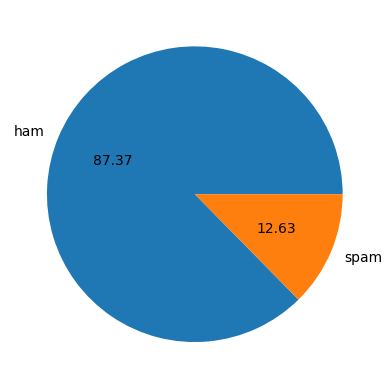

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
# Data is imbalance as 87 % is ham and 13% is spam 

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mufad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.sample(5)

,target,text,num_characters
1939,1,More people are dogging in your area now. Call...,160
1691,0,I don't know but I'm raping dudes at poker,42
1753,0,Jus came back fr lunch wif my sis only. U leh?,46
1642,0,Sleeping nt feeling well,24
3063,0,Ok. How many should i buy.,26


In [27]:
# num of word 
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [31]:
df[df['target'] == 0]

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [32]:
df[df['target']==0][['num_characters','num_sentences','num_words']].head()

,num_characters,num_sentences,num_words
0,111,2,24
1,29,2,8
3,49,1,13
4,61,1,15
6,77,2,18


In [33]:
#Ham
df[df['target']==0][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [34]:
#spam
df[df['target']==1][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

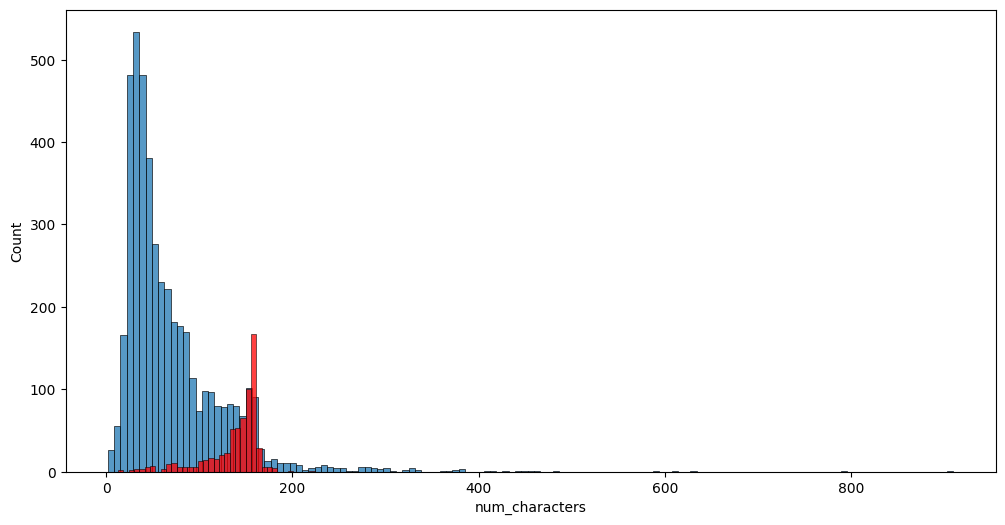

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

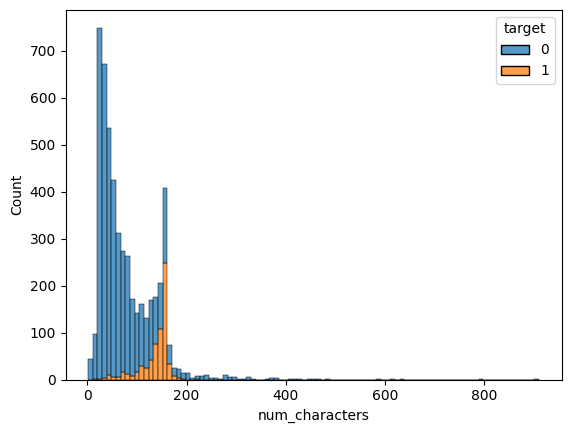

In [37]:
sns.histplot(data=df, x="num_characters", hue="target", multiple="stack")


<Axes: xlabel='num_words', ylabel='Count'>

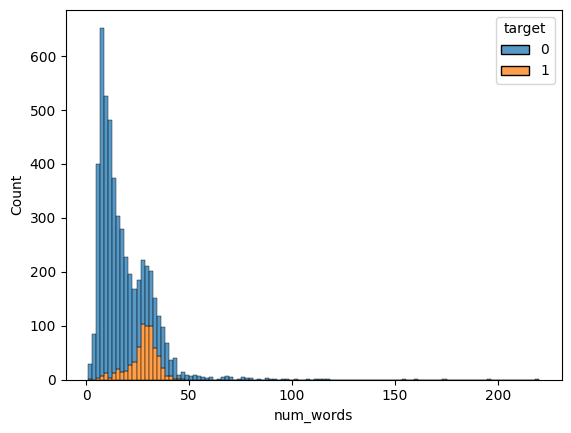

In [38]:
sns.histplot(data=df, x="num_words", hue="target", multiple="stack")
# 0 - ham
# 1 - spam

In [39]:
# hence ham has more words / characters ie hm (ham more)
# spam has very low ie sl (spam low)

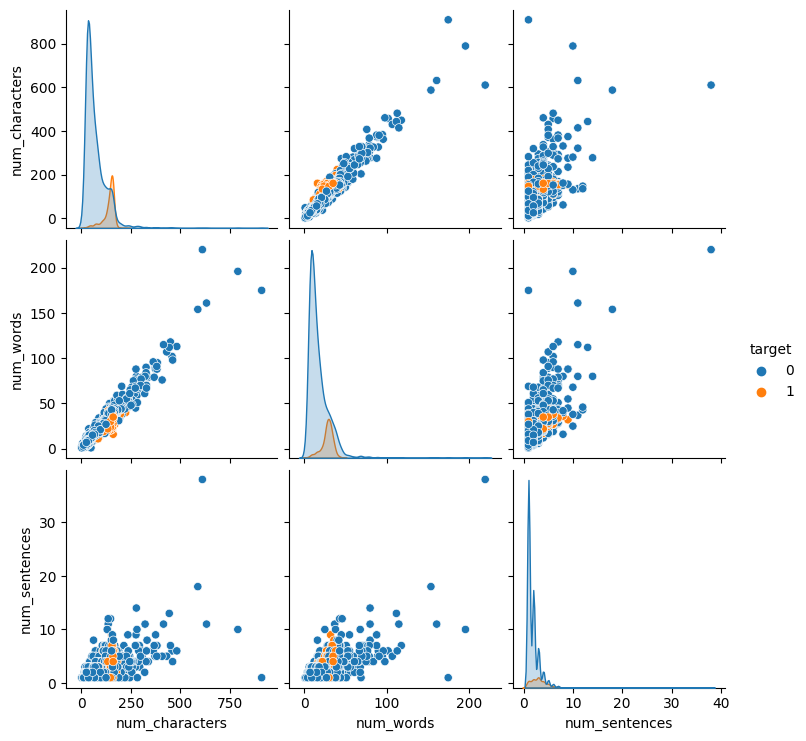

In [40]:
sns.pairplot(df, hue='target')

C:\Users\mufad\AppData\Local\Temp\ipykernel_19568\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

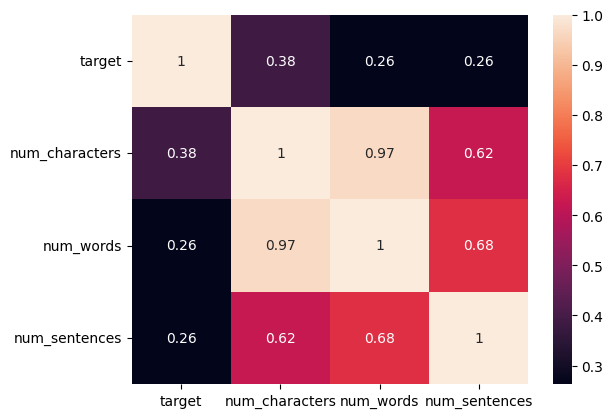

In [41]:
sns.heatmap(df.corr(),annot=True)

In [42]:
# from above we get following 

# 1) num_charac has 97% num_words ie high corr (correlations) 
# 2) Also same for num_charac and num sen 62% corr 

# As we know Features should be Independent in Nature ie Non Corr

# Thus we have to select only one Feature amoung 3 F's

# As num_characters has highest corr with target ie 38% Hence its Selected
  

3) Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [43]:
text = 'HOw ARe You'
text = 'How are you %!'
text.lower()

'how are you %!'

In [44]:
w = nltk.word_tokenize(text)
w

['How', 'are', 'you', '%', '!']

In [45]:
y = []
for i in w:
    if i.isalnum():
        y.append(i)

y

['How', 'are', 'you']

In [46]:
#nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords

stopwords.words('english')

In [48]:
import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)                                                                        



In [50]:
df['transformed_text'] = df['text'].apply(transform_text)


In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


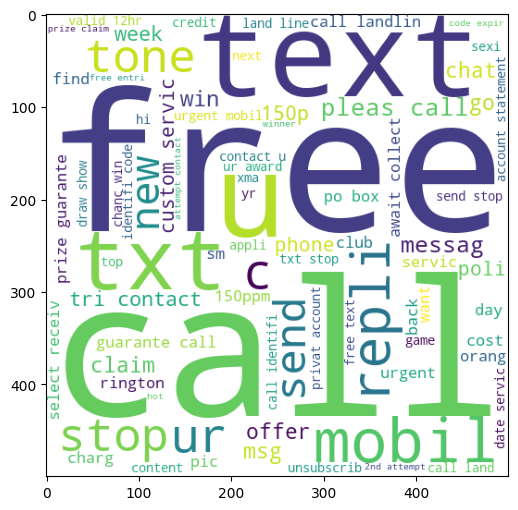

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


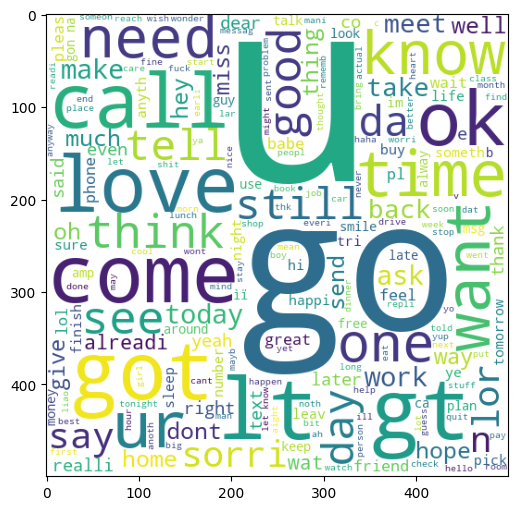

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [58]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)


9939

In [82]:
from collections import Counter

spam = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [83]:
spam.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


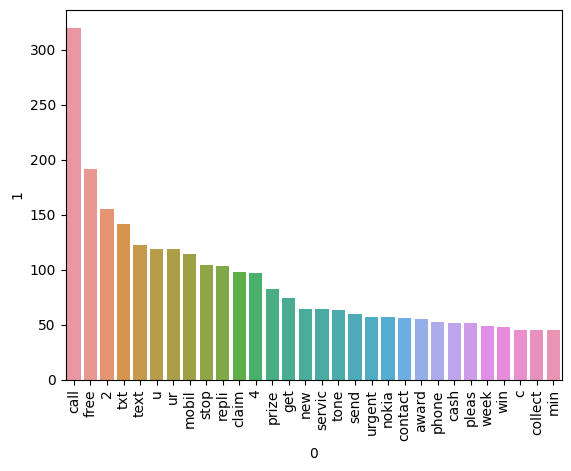

In [84]:
sns.barplot(data=spam , x = 0 , y = 1 )
plt.xticks(rotation='vertical')
plt.show()

In [92]:
ham_corpus = []
for text in df[df['target'] ==0]['transformed_text']:
    for word in text.split() :

        ham_corpus.append(word)
        


In [ ]:
Counter(ham_corpus)

In [ ]:
Counter(ham_corpus).most_common(30)

In [98]:
ham = pd.DataFrame(Counter(ham_corpus).most_common(30))

In [99]:
ham.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()